In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [34]:
input_size = 784
hidden_size = 512
num_classes = 10
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [29]:
train_dataset = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [30]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

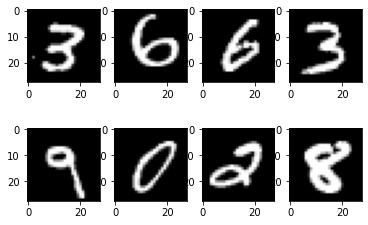

In [31]:
X, y = next(iter(test_loader))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X[i][0], cmap='gray')

plt.show() 

In [32]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
model = Model(
    input_size=input_size,
    hidden_size=hidden_size,
    num_classes=num_classes
).to(device)

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
model.train()

log_every = 1

for epoch in range(num_epochs):

    for X, y in train_loader:
        X = X.reshape(-1, 28*28).to(device)
        y = y.to(device)

        pred = model(X)
        loss = criterion(pred, y)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss /= len(y)

    if (epoch+1) % log_every == 0:
        print(f'Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss}')

Epoch 1/10 - Loss: 0.4401831004157657
Epoch 2/10 - Loss: 0.15869425279213445
Epoch 3/10 - Loss: 0.23912970672416167
Epoch 4/10 - Loss: 0.07583203195437364
Epoch 5/10 - Loss: 0.11047409396486685
Epoch 6/10 - Loss: 0.2212427505705645
Epoch 7/10 - Loss: 0.1349722729370194
Epoch 8/10 - Loss: 0.1691566488639782
Epoch 9/10 - Loss: 0.026490813355968354
Epoch 10/10 - Loss: 0.13097183760237047


In [54]:
model.eval()

num_correct = 0
num_samples = 0

for X, y in test_loader:
    X = X.reshape(-1, 28*28).to(device)
    y = y.to(device)

    _, pred = model(X).max(dim=1)
    num_correct += (pred == y).sum().item()
    num_samples += y.size(0)

acc = 100 * num_correct / num_samples
print(f'Accuracy: {acc}%')

Accuracy: 97.87%
